In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Data
calibrated_df = pd.read_csv("calibrated_ILB_scores_FINAL.csv")

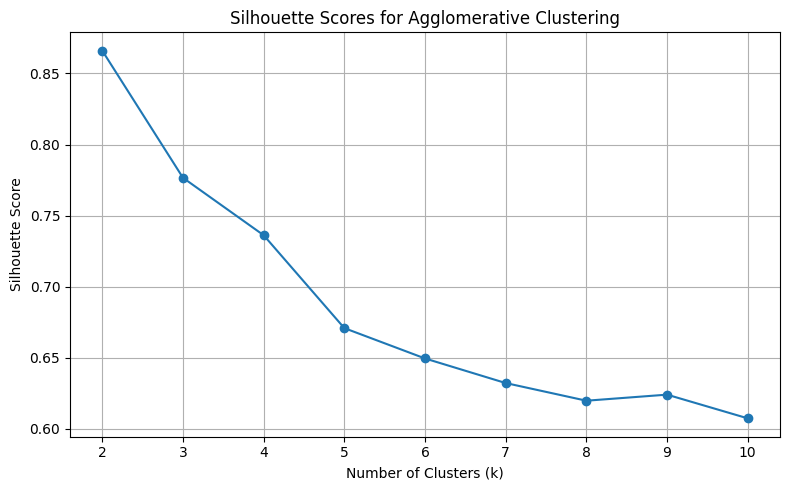

In [5]:
# Select only the numeric score columns (exclude 'bank_name')
score_cols = [
    'Data_calibrated_score',
    'Analytics_calibrated_score',
    'Technology_calibrated_score',
    'Analog_calibrated_score'
]
score_data = calibrated_df[score_cols]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(score_data)

# Try different values of k (number of clusters) and compute silhouette scores
silhouette_scores = []
range_k = range(2, 11)

for k in range_k:
    clusterer = AgglomerativeClustering(n_clusters=k)
    labels = clusterer.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Plot silhouette scores to identify optimal k
plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.xticks(range_k)
plt.title("Silhouette Scores for Agglomerative Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
#Clustering with k=4

clusterer = AgglomerativeClustering(n_clusters=4)
labels = clusterer.fit_predict(scaled_data)

# Add labels to dataframe
clustered_df = calibrated_df.copy()
clustered_df['cluster'] = labels

# Summarize the mean calibrated scores per cluster
cluster_summary_4 = clustered_df.groupby('cluster').mean(numeric_only=True)

print("Cluster Summary (k=4):")
print(cluster_summary_4)

# Save new version with only k=4 cluster
output_path = "calibrated_ILB_scores_with_cluster4.csv"
clustered_df.to_csv(output_path, index=False)

output_path


Cluster Summary (k=4):
         Data_calibrated_score  Analytics_calibrated_score  \
cluster                                                      
0                     2.402829                    2.585570   
1                     2.655866                    2.942338   
2                     2.916631                    3.310003   
3                     3.743641                    4.476042   

         Technology_calibrated_score  Analog_calibrated_score  
cluster                                                        
0                           2.212031                 2.562476  
1                           2.398084                 2.900083  
2                           2.589821                 3.248002  
3                           3.197906                 4.351415  


'calibrated_ILB_scores_with_cluster4.csv'

In [7]:
#Clustering with k=5

clusterer = AgglomerativeClustering(n_clusters=5)
labels = clusterer.fit_predict(scaled_data)

# Add labels to dataframe
clustered_df = calibrated_df.copy()
clustered_df['cluster'] = labels

# Summarize the mean calibrated scores per cluster
cluster_summary_5 = clustered_df.groupby('cluster').mean(numeric_only=True)

print("Cluster Summary (k=5):")
print(cluster_summary_5)

# Save new version with only k=5 cluster
output_path = "calibrated_ILB_scores_with_cluster5.csv"
clustered_df.to_csv(output_path, index=False)

output_path

Cluster Summary (k=5):
         Data_calibrated_score  Analytics_calibrated_score  \
cluster                                                      
0                     2.383126                    2.557790   
1                     2.655866                    2.942338   
2                     2.916631                    3.310003   
3                     3.743641                    4.476042   
4                     2.486565                    2.703633   

         Technology_calibrated_score  Analog_calibrated_score  
cluster                                                        
0                           2.197544                 2.536188  
1                           2.398084                 2.900083  
2                           2.589821                 3.248002  
3                           3.197906                 4.351415  
4                           2.273600                 2.674198  


'calibrated_ILB_scores_with_cluster5.csv'

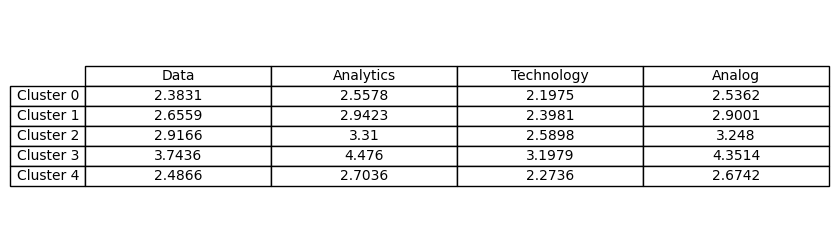

In [9]:
#Seeing Cluster Summary (k = 5)

# Use your existing cluster_summary output
cluster_summary_5 = clustered_df.groupby('cluster')[[
    'Data_calibrated_score',
    'Analytics_calibrated_score',
    'Technology_calibrated_score',
    'Analog_calibrated_score'
]].mean(numeric_only=True)

# Step 1: Prepare the styled table
styled_table = cluster_summary_5.round(4)
styled_table = styled_table.rename(columns={
    'Data_calibrated_score': 'Data',
    'Analytics_calibrated_score': 'Analytics',
    'Technology_calibrated_score': 'Technology',
    'Analog_calibrated_score': 'Analog'
})

# Step 2: Plot and export as an image
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

table = ax.table(
    cellText=styled_table.values,
    colLabels=styled_table.columns,
    rowLabels=[f'Cluster {i}' for i in styled_table.index],
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.savefig("Cluster_Summary_Table.png", bbox_inches='tight', dpi=300)
plt.show()
